# Testes de transmissão de dados

In [1]:
import pandas as pd

In [2]:
data_wifi = pd.read_csv('dados_wifi.csv')
data_wifi = data_wifi.dropna()
data_wifi = data_wifi.drop_duplicates()
data_wifi.head()
# Tempo(ms) -> Tempo(s)
data_wifi['Tempo_s'] = data_wifi['Tempo']/1000


In [3]:
data_wifi.head()

,Tempo,RSSI,SNR,num_pacote,Tempo_s
0,4870,-28,1,0,4.870
1,7324,-31,1,1,7.324
2,9787,-36,1,2,9.787
3,12243,-31,1,3,12.243
4,14699,-34,1,4,14.699


In [4]:
# import matplotlib.pyplot as plt

# # Converte o tempo para segundos e ajusta o início do tempo para zero
# data_wifi['Tempo'] = data_wifi['Tempo'] / 1000
# data_wifi['Tempo'] = data_wifi['Tempo'] - data_wifi['Tempo'].iloc[0]

# # Criação do gráfico de pontos
# plt.figure(figsize=(10, 6))
# plt.scatter(data_wifi['Tempo'], data_wifi['RSSI'], label='RSSI', marker='o', color='blue')

# # Adicionar linhas com barras quando o intervalo entre os pontos é maior que 300 ms
# for i in range(1, len(data_wifi)):
#     # Calcula a diferença de tempo entre pontos consecutivos
#     intervalo_tempo = data_wifi['Tempo'].iloc[i] - data_wifi['Tempo'].iloc[i - 1]
#     if intervalo_tempo > 0.3:  # 300 ms em segundos
#         # Extrai as coordenadas dos pontos que estão distantes
#         x_coords = [data_wifi['Tempo'].iloc[i - 1], data_wifi['Tempo'].iloc[i]]
#         y_coords = [data_wifi['RSSI'].iloc[i - 1], data_wifi['RSSI'].iloc[i]]
        
#         # Plota uma linha com barras (capsize) entre os pontos distantes
#         plt.plot(x_coords, y_coords, color='orange', linestyle='--', marker='|', markersize=10)

# # Configurações dos eixos e exibição
# plt.xlabel('Tempo (s)')
# plt.ylabel('Intensidade do Sinal (dB)')
# plt.title('Gráfico de Tempo vs RSSI (Intensidade do sinal)')
# plt.legend()
# plt.grid(True)
# plt.show()


In [5]:
# Função para adicionar uma coluna de grupo com base no delta negativo
def dividir_teste(df):
    # Cria uma coluna de grupo que incrementa quando o delta é negativo
    df['grupo'] = (df['Tempo'].diff() < 0).cumsum()
    return df

# Aplicando a função
df_wifi_dividido = dividir_teste(data_wifi)

# Exibindo o resultado
df_wifi_dividido


,Tempo,RSSI,SNR,num_pacote,Tempo_s,grupo
0,4870,-28,1,0,4.870,0
1,7324,-31,1,1,7.324,0
2,9787,-36,1,2,9.787,0
3,12243,-31,1,3,12.243,0
4,14699,-34,1,4,14.699,0
...,...,...,...,...,...,...
375,235055,-41,1,78,235.055,2
376,237923,-42,1,79,237.923,2
377,240686,-41,1,80,240.686,2
378,247345,-42,1,81,247.345,2


In [6]:
#pegando os dados de cada grupo
df_wifi_dividido_0 = df_wifi_dividido[df_wifi_dividido['grupo'] == 0] 

df_wifi_dividido_1 = df_wifi_dividido[df_wifi_dividido['grupo'] == 1] 

df_wifi_dividido_2 = df_wifi_dividido[df_wifi_dividido['grupo'] == 2] 


In [7]:
# faça um código que retire outlier da coluna tempo
print(df_wifi_dividido_0.shape)
df_wifi_dividido_0

(157, 6)


,Tempo,RSSI,SNR,num_pacote,Tempo_s,grupo
0,4870,-28,1,0,4.870,0
1,7324,-31,1,1,7.324,0
2,9787,-36,1,2,9.787,0
3,12243,-31,1,3,12.243,0
4,14699,-34,1,4,14.699,0
...,...,...,...,...,...,...
152,382403,-40,1,152,382.403,0
153,384937,-37,1,153,384.937,0
154,387330,-41,1,154,387.330,0
155,389783,-40,1,155,389.783,0


In [54]:
import matplotlib.pyplot as plt

def plotar_dados(data_wifi, snr=False):
    # Ajustar a coluna Tempo para que o primeiro valor seja 0
    data_wifi['Tempo'] = data_wifi['Tempo'] / 1000 # convertendo para segundos
    data_wifi['Tempo'] = data_wifi['Tempo'] - data_wifi['Tempo'].iloc[0]
    # Plotar os dados
    plt.figure(figsize=(10, 6))
    # plote um grafico só de pontos 
    plt.scatter(data_wifi['Tempo'], data_wifi['RSSI'], label='RSSI', marker='o')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Intensidade do Sinal (dB)')
    plt.title('Gráfico de Tempo vs RSSI (Intensidade do sinal)')
    plt.legend()
    plt.grid(True)
    plt.show()
    if snr:
        plt.figure(figsize=(10, 6))
        plt.scatter(data_wifi['Tempo'], data_wifi['SNR'], label='SNR', marker='x')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Qualidade do Sinal (dB)')
        plt.title('Gráfico de Tempo vs SNR (Intensidade do sinal)')
        plt.legend()
        plt.grid(True)
        plt.show()

    

C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] / 1000 # convertendo para segundos
C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] - data_wifi['Tempo'].iloc[0]


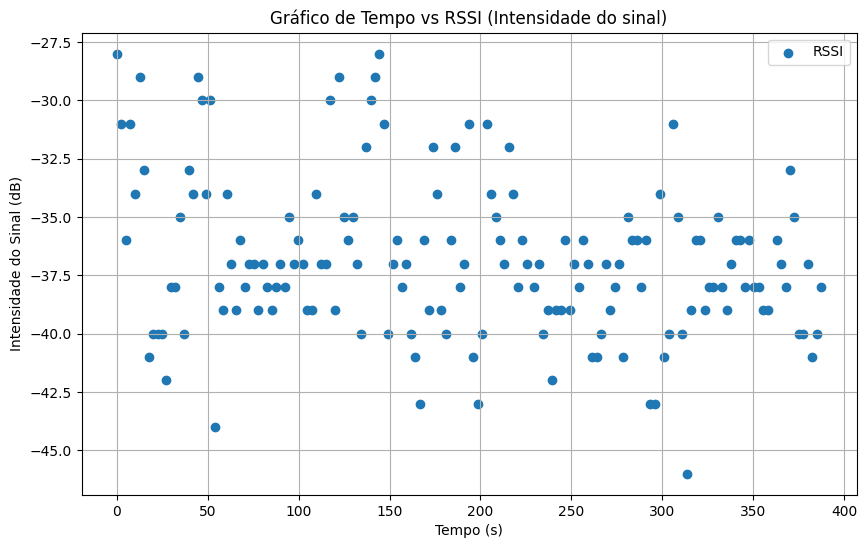

In [9]:
plotar_dados(df_wifi_dividido_0)

C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] / 1000 # convertendo para segundos
C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] - data_wifi['Tempo'].iloc[0]


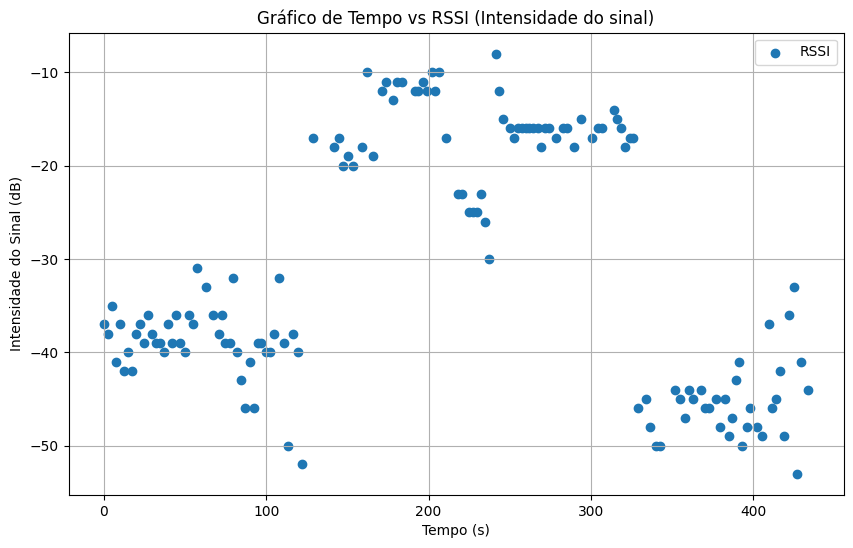

In [10]:
plotar_dados(df_wifi_dividido_1)

C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] / 1000 # convertendo para segundos
C:\Users\Lincoln\AppData\Local\Temp\ipykernel_31268\624038173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wifi['Tempo'] = data_wifi['Tempo'] - data_wifi['Tempo'].iloc[0]


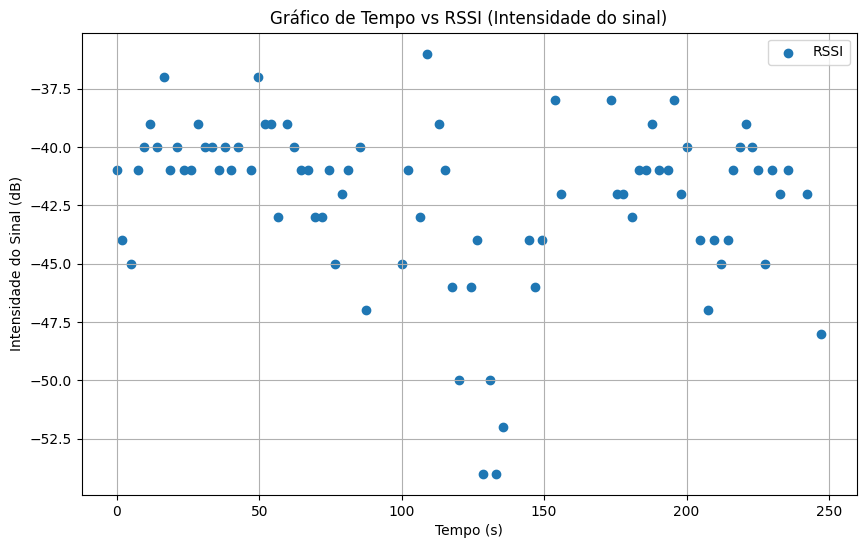

In [11]:
plotar_dados(df_wifi_dividido_2)

In [12]:
df_wifi_dividido_2.describe()

,Tempo,RSSI,SNR,num_pacote,Tempo_s,grupo
count,83.000000,83.000000,83.0,83.000000,83.000000,83.0
mean,117.681313,-42.168675,1.0,41.000000,122.647313,2.0
std,75.791796,3.495011,0.0,24.103942,75.791796,0.0
min,0.000000,-54.000000,1.0,0.000000,4.966000,2.0
25%,50.693500,-44.000000,1.0,20.500000,55.659500,2.0
50%,115.217000,-41.000000,1.0,41.000000,120.183000,2.0
75%,189.232500,-40.000000,1.0,61.500000,194.198500,2.0
max,247.292000,-36.000000,1.0,82.000000,252.258000,2.0


In [13]:
#verifica delta maior que 3 segundos
df_wifi_dividido_2['Tempo'].diff().max()

np.float64(17.61699999999999)

## Import para os dados LoRa

In [14]:
dados_lora = pd.read_csv('dados_lora.csv')

dados_lora = dados_lora.dropna()
dados_lora = dados_lora.drop_duplicates()
dados_lora.head()

,Tempo,RSSI,SNR,num_pacote
0,795901,-90,8.75,1482
1,796438,-79,9.00,1483
2,796975,-84,9.00,1484
3,797512,-77,9.00,1485
4,798049,-74,9.00,1486


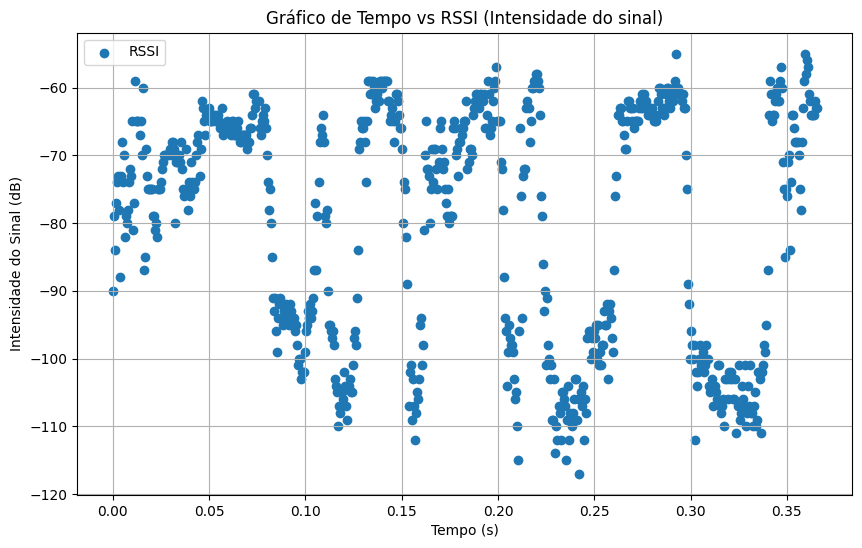

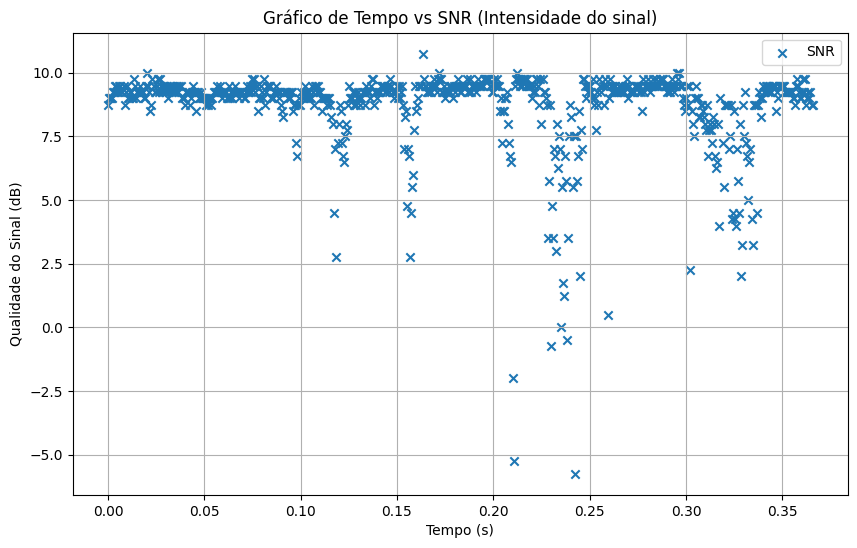

In [55]:
plotar_dados(dados_lora, snr=True)

In [16]:
dados_lora.describe()

,Tempo,RSSI,SNR,num_pacote
count,679.000000,679.000000,679.000000,679.000000
mean,182.957244,-79.796760,8.700295,1822.702504
std,105.730192,17.417566,1.724374,196.890488
min,0.000000,-117.000000,-5.750000,1482.000000
25%,91.558500,-98.000000,8.750000,1652.500000
50%,183.117000,-73.000000,9.250000,1823.000000
75%,274.138500,-65.000000,9.500000,1992.500000
max,365.697000,-55.000000,10.750000,2163.000000


In [17]:
#Calcular média do menor quartil e do maior quartil
menor_quartil = dados_lora['RSSI'].quantile(0.25)
maior_quartil = dados_lora['RSSI'].quantile(0.75)


In [18]:
dados_lora['Profundidade'] = (data_wifi['RSSI'] + 62) / (-110 + 62) * 1  # Fórmula de interpolação


In [23]:
import numpy as np
dados_lora
# aonde te nan escreva 0
#
dados_lora["Profundidade"] = dados_lora['Profundidade'].fillna(0)

In [20]:
# Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil)
q1 = dados_lora['RSSI'].quantile(0.25)
q3 = dados_lora['RSSI'].quantile(0.75)
# q1 = dados_series.quantile(0.25)
# q3 = dados_series.quantile(0.75)

# Filtrar os dados abaixo do primeiro quartil e acima do terceiro quartil
dados_primeiro_quartil = dados_lora[dados_lora['RSSI'] <= q1]
dados_terceiro_quartil = dados_lora[dados_lora['RSSI'] >= q3]

# Calcular as médias dos dois quartis
media_primeiro_quartil = dados_primeiro_quartil["RSSI"].mean()
media_terceiro_quartil = dados_terceiro_quartil["RSSI"].mean()


In [24]:
dados_lora

,Tempo,RSSI,SNR,num_pacote,Profundidade
0,0.000,-90,8.75,1482,-0.708333
1,0.537,-79,9.00,1483,-0.645833
2,1.074,-84,9.00,1484,-0.541667
3,1.611,-77,9.00,1485,-0.645833
4,2.148,-74,9.00,1486,-0.583333
...,...,...,...,...,...
674,363.549,-64,9.25,2159,0.000000
675,364.086,-64,9.00,2160,0.000000
676,364.623,-62,9.25,2161,0.000000
677,365.160,-63,8.75,2162,0.000000


In [22]:
print(f'Média do primeiro quartil: {media_primeiro_quartil}')
print(f'Média do terceiro quartil: {media_terceiro_quartil}')

Média do primeiro quartil: -104.3757225433526
Média do terceiro quartil: -62.32535885167464


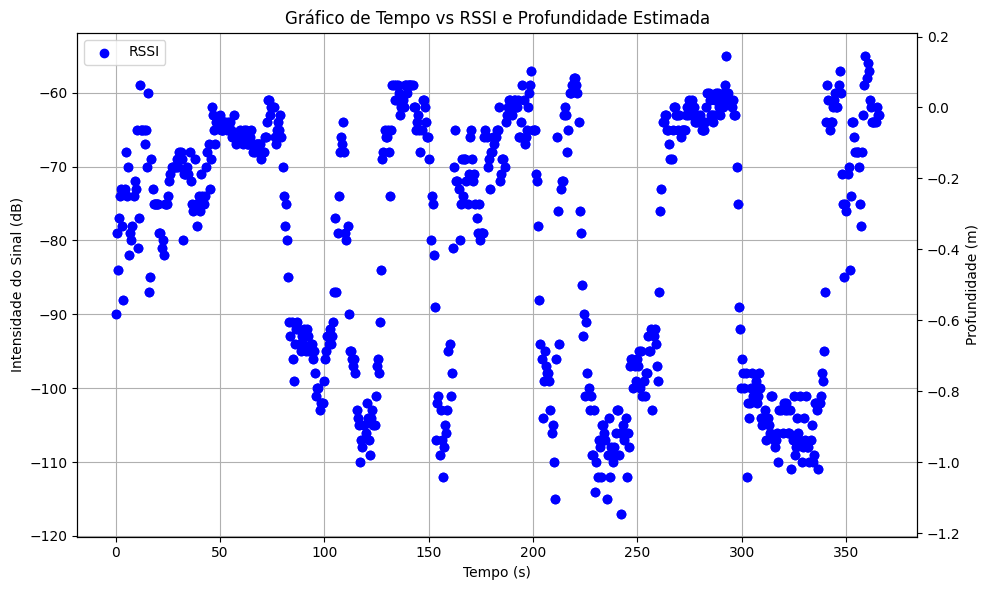

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar a coluna Tempo para que o primeiro valor seja 0
# dados_lora['Tempo'] = dados_lora['Tempo'] / 1000  # Convertendo para segundos
# dados_lora['Tempo'] = dados_lora['Tempo'] - dados_lora['Tempo'].iloc[0]

# Calcular a profundidade usando uma correspondência linear de RSSI para profundidade
# -62dB -> 0m e -110dB -> 1m
dados_lora['Profundidade'] = (dados_lora['RSSI'] + 62) / 48
# Adicionar erro aleatório na profundidade para simular variação nas leituras

# Criar a figura e o primeiro eixo (para RSSI)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de pontos para RSSI
ax1.scatter(dados_lora['Tempo'], dados_lora['RSSI'], label='RSSI', marker='o', color='b')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Intensidade do Sinal (dB)')
ax1.tick_params(axis='y')
ax1.legend(loc="upper left")  # Apenas legenda para RSSI

ax1.grid(True)

# Adicionar um segundo eixo (para Profundidade)
ax2 = ax1.twinx()  # Cria um segundo eixo y compartilhando o mesmo eixo x

# Plotar profundidade no segundo eixo
ax2.scatter(dados_lora['Tempo'], dados_lora['Profundidade'], label='Profundidade', color='b', marker='o')
ax2.set_ylabel('Profundidade (m)')
ax2.tick_params(axis='y')





# Adicionar título e legendas
plt.title('Gráfico de Tempo vs RSSI e Profundidade Estimada')
fig.tight_layout()  # Ajuste para evitar sobreposição de textos
# fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Exibir o gráfico
plt.show()


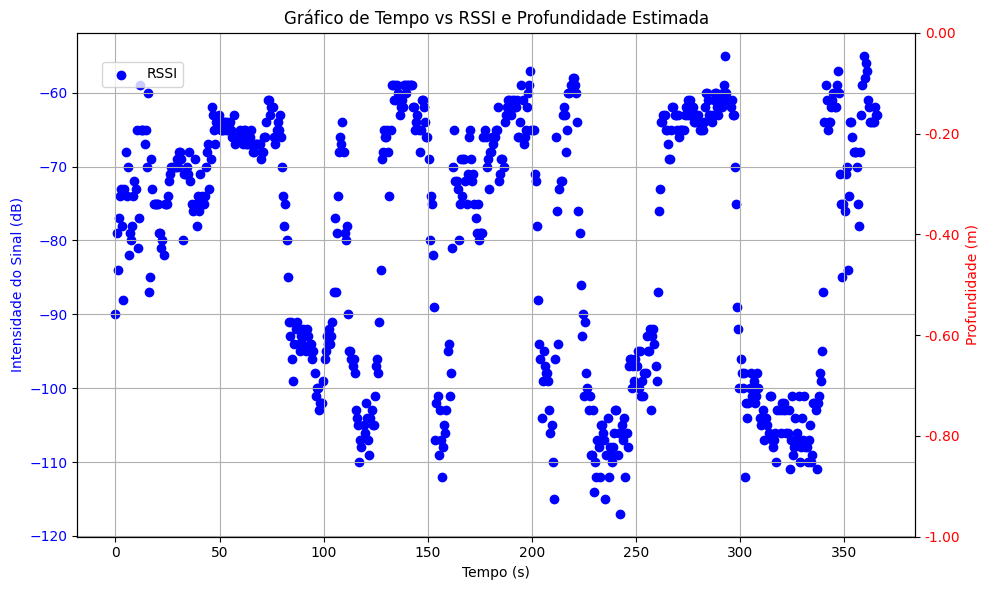

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular a profundidade usando uma correspondência linear de RSSI para profundidade
# -62dB -> 0m e -110dB -> 1m
dados_lora['Profundidade'] = (dados_lora['RSSI'] + 62) / 48

# Criar a figura e o primeiro eixo (para RSSI)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de pontos para RSSI
ax1.scatter(dados_lora['Tempo'], dados_lora['RSSI'], label='RSSI', marker='o', color='b')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Intensidade do Sinal (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Adicionar um segundo eixo (para Profundidade)
ax2 = ax1.twinx()  # Cria um segundo eixo y compartilhando o mesmo eixo x

# Não plotar a linha de profundidade
# Apenas ajustar os ticks e rótulos do eixo Y de profundidade
ax2.set_ylabel('Profundidade (m)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Definir os valores mínimos e máximos do RSSI para alinhar com a profundidade
min_rssi, max_rssi = -62, -110  # RSSI mínimo e máximo
min_profundidade = (min_rssi + 62) / 48  # Profundidade para -62 dB
max_profundidade = (max_rssi + 62) / 48  # Profundidade para -110 dB

# Definir os intervalos para o eixo secundário de profundidade
intervalos = np.linspace(min_profundidade, max_profundidade, num=6)  # 6 intervalos entre 0 e 1 metro

# Ajustar os ticks no segundo eixo Y (Profundidade)
ax2.set_yticks(intervalos[::-1])  # Inverter para o eixo de profundidade (0m em cima, 1m embaixo)

# Definir os rótulos para os ticks (de profundidade)
ax2.set_yticklabels([f"{val:.2f}" for val in intervalos])  # Mostrar profundidade com duas casas decimais

# Definir o limite do eixo à direita para profundidade
ax2.set_ylim(min_profundidade, max_profundidade)

# Ajustar a cor dos rótulos do eixo à direita
ax2.tick_params(axis='y', labelcolor='r')

# Adicionar título e legendas
plt.title('Gráfico de Tempo vs RSSI e Profundidade Estimada')
fig.tight_layout()  # Ajuste para evitar sobreposição de textos
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Exibir o gráfico
plt.show()


In [28]:
dados_lora['Profundidade'] = (dados_lora['RSSI'] + 62) / 48  # Fórmula ajustada
  # Fórmula de interpolação corrigida
# Exibir as primeiras linhas para verificar o cálculo
print(dados_lora[['RSSI', 'Profundidade']].head())

   RSSI  Profundidade
0   -90     -0.583333
1   -79     -0.354167
2   -84     -0.458333
3   -77     -0.312500
4   -74     -0.250000
